# In this notebook we will ingest and combine all of our data into one usable dataframe  

### Loading Pandas to manipulate our data

In [15]:
# !pip3 install pandas==2.0.0

In [16]:
import pandas as pd

## Setting working directory

In [17]:
# Set a working directory
#!pip install GitPython
import git
import os

repo = git.Repo('.', search_parent_directories=True)


os.chdir(repo.working_tree_dir)


## Creating Real Time data set that includes CMAP and PAR data

### Loading in covariate data that has colocalized CMAP features

In [18]:
covari_cmap_path = 'data/modified/Seaflow_covariates_CMAP.csv'
#using pandas to read in as a df
covari_cmap = (pd.read_csv(covari_cmap_path))
#making time a datatime object
covari_cmap['time'] = pd.to_datetime(covari_cmap['time'])

#dropping depth column which was used to to get CMAP Darwin Nutrient Climatology data
covari_cmap.drop('depth', axis=1, inplace=True)
#taking a peak at the data
covari_cmap.head(3)


,time,PopulationName,lat,lon,Biomass_pgC_per_L,salin,temp,cruisename,CMAP_SiO2_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_POSi_darwin_clim_tblDarwin_Nutrient_Climatology,...,CMAP_NO2_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_NH4_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_FeT_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_DOP_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_DON_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_DOFe_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_DOC_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_DIC_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_CDOM_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_ALK_darwin_clim_tblDarwin_Nutrient_Climatology
0,2016-04-20 07:00:00,Prochlorococcus,21.520326,-158.326984,10.520443,34.893785,24.351745,KOK1606,-0.022845,-0.000127,...,0.295276,1.282981,0.000015,0.013734,0.248717,0.000017,1.648093,1697.874775,0.000034,1954.87665
1,2016-04-20 07:00:00,Synechococcus,21.520326,-158.326984,0.341429,34.893785,24.351745,KOK1606,-0.022845,-0.000127,...,0.295276,1.282981,0.000015,0.013734,0.248717,0.000017,1.648093,1697.874775,0.000034,1954.87665
2,2016-04-20 07:00:00,nanoeukaryotes (2-5µm),21.520326,-158.326984,3.338212,34.893785,24.351745,KOK1606,-0.022845,-0.000127,...,0.295276,1.282981,0.000015,0.013734,0.248717,0.000017,1.648093,1697.874775,0.000034,1954.87665


### Loading in cruise par CTD data

In [19]:
par_path = 'data/original/EnvironmentalData.csv'
#reading in par data and dropping unnessasary columns (conductivity, par)
par = (pd.read_csv(par_path)
       #dropping unessasary columns
       .drop(columns=['salinity', 'temp', 'SiO4', 'NO3_NO2',
                     'PO4', 'Fe', 'PP', 'chl', 'MLD',
                     'cruise'], axis=1)
       #renaming so it matches the name format of the covariates df
       .rename({'date':'time'}, axis=1)
      )
      

#making the time column a datetime64[ns]
par['time'] = pd.to_datetime(par['time'])

#droping all nan values
par = par.dropna()
par.sort_values(by='time')

,par,time,lat,lon
92,1020.094444,2011-10-26 17:00:00,47.000000,-127.700000
454,992.973494,2011-10-26 22:00:00,46.300000,-128.900000
458,962.789610,2011-10-26 23:00:00,46.200000,-129.200000
464,1025.041818,2011-10-27 00:00:00,46.000000,-129.400000
489,1025.442857,2011-10-27 01:00:00,45.900000,-129.700000
...,...,...,...,...
935,1722.103000,2021-12-29 21:00:00,32.648323,-118.079951
936,1117.570500,2021-12-29 22:00:00,32.709330,-118.180315
949,568.868550,2021-12-29 23:00:00,32.806110,-118.294397
944,127.692150,2021-12-30 00:00:00,32.900902,-118.407436


## Joining covari_cmap and par data into one dataframe

### Now we can merge the par data and Seaflow/CMAP data into one dataframe called combined

In [20]:

combined = covari_cmap.merge(par.drop(['lat','lon'], axis=1), left_on=['time'], right_on=['time'])
combined

,time,PopulationName,lat,lon,Biomass_pgC_per_L,salin,temp,cruisename,CMAP_SiO2_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_POSi_darwin_clim_tblDarwin_Nutrient_Climatology,...,CMAP_NH4_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_FeT_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_DOP_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_DON_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_DOFe_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_DOC_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_DIC_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_CDOM_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_ALK_darwin_clim_tblDarwin_Nutrient_Climatology,par
0,2016-04-20 07:00:00,Prochlorococcus,21.520326,-158.326984,10.520443,34.893785,24.351745,KOK1606,-0.022845,-0.000127,...,1.282981,0.000015,0.013734,0.248717,0.000017,1.648093,1697.874775,0.000034,1954.876650,0.019300
1,2016-04-20 07:00:00,Synechococcus,21.520326,-158.326984,0.341429,34.893785,24.351745,KOK1606,-0.022845,-0.000127,...,1.282981,0.000015,0.013734,0.248717,0.000017,1.648093,1697.874775,0.000034,1954.876650,0.019300
2,2016-04-20 07:00:00,nanoeukaryotes (2-5µm),21.520326,-158.326984,3.338212,34.893785,24.351745,KOK1606,-0.022845,-0.000127,...,1.282981,0.000015,0.013734,0.248717,0.000017,1.648093,1697.874775,0.000034,1954.876650,0.019300
3,2016-04-20 07:00:00,picoeukaryotes (< 2µm),21.520326,-158.326984,0.701902,34.893785,24.351745,KOK1606,-0.022845,-0.000127,...,1.282981,0.000015,0.013734,0.248717,0.000017,1.648093,1697.874775,0.000034,1954.876650,0.019300
4,2016-04-20 08:00:00,Prochlorococcus,21.662710,-158.323430,9.309387,34.902376,24.339265,KOK1606,-0.022845,-0.000127,...,1.282981,0.000015,0.013734,0.248717,0.000017,1.648093,1697.874775,0.000034,1954.876650,0.020382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11126,2021-12-30 00:00:00,picoeukaryotes (< 2µm),32.673493,-117.545342,3.774488,33.468151,15.189021,TN398,0.363296,0.099231,...,0.242743,0.000497,0.164132,2.736920,0.000178,19.695796,1819.587625,0.000756,2008.417775,127.692150
11127,2021-12-30 01:00:00,Prochlorococcus,32.682100,-117.660321,0.874599,33.478846,15.327302,TN398,0.363296,0.099231,...,0.242743,0.000497,0.164132,2.736920,0.000178,19.695796,1819.587625,0.000756,2008.417775,1.012800
11128,2021-12-30 01:00:00,Synechococcus,32.682100,-117.660321,9.707579,33.478846,15.327302,TN398,0.363296,0.099231,...,0.242743,0.000497,0.164132,2.736920,0.000178,19.695796,1819.587625,0.000756,2008.417775,1.012800
11129,2021-12-30 01:00:00,nanoeukaryotes (2-5µm),32.682100,-117.660321,2.428084,33.478846,15.327302,TN398,0.363296,0.099231,...,0.242743,0.000497,0.164132,2.736920,0.000178,19.695796,1819.587625,0.000756,2008.417775,1.012800


## Creating Hours since sunrise Variable:

This was added in hopes that it would help capture the daily differnce in magnifutude of biomass that the model underrepresents.

ephem is a python package for performing high-precision astronomy computations

In [21]:
#!pip install ephem - note: need to add to enviorment

In [22]:
import pandas as pd
import ephem

# Convert 'time' column to datetime format
combined['time'] = pd.to_datetime(combined['time']).dt.strftime('%Y/%m/%d %H:%M:%S')

# function to calculate sunrise and hours since sunrise
def calculate_hours_since_sunrise(row):
    """
    Both the dataframe and ephem need to be in the same time zone (in this case UTC).
    UTC is standard for ephem
    """
    
    #defining the ephem observer spatial temporal values to find previous sinrise time
    obs = ephem.Observer()
    obs.lat = str(row['lat'])
    obs.long = str(row['lon'])
    obs.date = row['time']
    
    #determining sunrise for each lat/lon/time
    sunrise = str(obs.previous_rising(ephem.Sun())) # 
    sunrise = pd.to_datetime(sunrise)
    
    #changing time column to datetime object
    row['time'] = pd.to_datetime(row['time'])
    
    row['sunrise'] = sunrise
    
    #calcualting hours since sunrise
    row['hours_since_sunrise'] = (row['time'] - sunrise).total_seconds() / 3600

    return row


    
# Applying function to each row for both functions
combined = combined.apply(calculate_hours_since_sunrise, axis=1)

# Print the resulting DataFrame
combined


,time,PopulationName,lat,lon,Biomass_pgC_per_L,salin,temp,cruisename,CMAP_SiO2_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_POSi_darwin_clim_tblDarwin_Nutrient_Climatology,...,CMAP_DOP_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_DON_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_DOFe_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_DOC_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_DIC_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_CDOM_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_ALK_darwin_clim_tblDarwin_Nutrient_Climatology,par,sunrise,hours_since_sunrise
0,2016-04-20 07:00:00,Prochlorococcus,21.520326,-158.326984,10.520443,34.893785,24.351745,KOK1606,-0.022845,-0.000127,...,0.013734,0.248717,0.000017,1.648093,1697.874775,0.000034,1954.876650,0.019300,2016-04-19 16:10:02,14.832778
1,2016-04-20 07:00:00,Synechococcus,21.520326,-158.326984,0.341429,34.893785,24.351745,KOK1606,-0.022845,-0.000127,...,0.013734,0.248717,0.000017,1.648093,1697.874775,0.000034,1954.876650,0.019300,2016-04-19 16:10:02,14.832778
2,2016-04-20 07:00:00,nanoeukaryotes (2-5µm),21.520326,-158.326984,3.338212,34.893785,24.351745,KOK1606,-0.022845,-0.000127,...,0.013734,0.248717,0.000017,1.648093,1697.874775,0.000034,1954.876650,0.019300,2016-04-19 16:10:02,14.832778
3,2016-04-20 07:00:00,picoeukaryotes (< 2µm),21.520326,-158.326984,0.701902,34.893785,24.351745,KOK1606,-0.022845,-0.000127,...,0.013734,0.248717,0.000017,1.648093,1697.874775,0.000034,1954.876650,0.019300,2016-04-19 16:10:02,14.832778
4,2016-04-20 08:00:00,Prochlorococcus,21.662710,-158.323430,9.309387,34.902376,24.339265,KOK1606,-0.022845,-0.000127,...,0.013734,0.248717,0.000017,1.648093,1697.874775,0.000034,1954.876650,0.020382,2016-04-19 16:09:53,15.835278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11126,2021-12-30 00:00:00,picoeukaryotes (< 2µm),32.673493,-117.545342,3.774488,33.468151,15.189021,TN398,0.363296,0.099231,...,0.164132,2.736920,0.000178,19.695796,1819.587625,0.000756,2008.417775,127.692150,2021-12-29 14:51:21,9.144167
11127,2021-12-30 01:00:00,Prochlorococcus,32.682100,-117.660321,0.874599,33.478846,15.327302,TN398,0.363296,0.099231,...,0.164132,2.736920,0.000178,19.695796,1819.587625,0.000756,2008.417775,1.012800,2021-12-29 14:51:50,10.136111
11128,2021-12-30 01:00:00,Synechococcus,32.682100,-117.660321,9.707579,33.478846,15.327302,TN398,0.363296,0.099231,...,0.164132,2.736920,0.000178,19.695796,1819.587625,0.000756,2008.417775,1.012800,2021-12-29 14:51:50,10.136111
11129,2021-12-30 01:00:00,nanoeukaryotes (2-5µm),32.682100,-117.660321,2.428084,33.478846,15.327302,TN398,0.363296,0.099231,...,0.164132,2.736920,0.000178,19.695796,1819.587625,0.000756,2008.417775,1.012800,2021-12-29 14:51:50,10.136111


### Checking accuracy of hours since sunrise by comparing it to the ship's PAR sensor

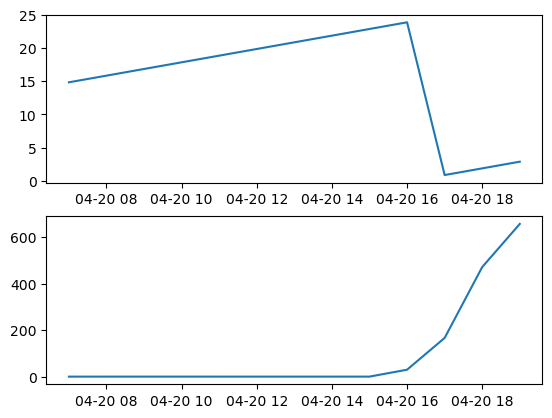

In [23]:
import matplotlib.pyplot as plt

cruise1_ = combined[combined['cruisename'] == 'KOK1606']
cruise1=cruise1_[:50]
fig, axs = plt.subplots(2,1)

axs[0].plot(cruise1['time'], cruise1['hours_since_sunrise'])
axs[1].plot(cruise1['time'], cruise1['par'])

### There are some values over 24 hours, but only by a few minuites likely due to changing postion of the ship through its route.

In [24]:
combined[combined['hours_since_sunrise'] > 24]

,time,PopulationName,lat,lon,Biomass_pgC_per_L,salin,temp,cruisename,CMAP_SiO2_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_POSi_darwin_clim_tblDarwin_Nutrient_Climatology,...,CMAP_DOP_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_DON_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_DOFe_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_DOC_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_DIC_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_CDOM_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_ALK_darwin_clim_tblDarwin_Nutrient_Climatology,par,sunrise,hours_since_sunrise
3427,2017-08-21 15:00:00,Synechococcus,48.309140,-149.340410,5.731809,32.542460,13.601825,KM1712,0.030784,0.007970,...,0.279331,4.495100,0.000284,33.519706,1939.835325,0.000840,2118.820500,32.440699,2017-08-20 14:58:39,24.022500
3428,2017-08-21 15:00:00,nanoeukaryotes (2-5µm),48.309140,-149.340410,15.972009,32.542460,13.601825,KM1712,0.030784,0.007970,...,0.279331,4.495100,0.000284,33.519706,1939.835325,0.000840,2118.820500,32.440699,2017-08-20 14:58:39,24.022500
3429,2017-08-21 15:00:00,picoeukaryotes (< 2µm),48.309140,-149.340410,8.706522,32.542460,13.601825,KM1712,0.030784,0.007970,...,0.279331,4.495100,0.000284,33.519706,1939.835325,0.000840,2118.820500,32.440699,2017-08-20 14:58:39,24.022500
3562,2017-08-23 15:00:00,Synechococcus,49.699340,-149.692900,7.041974,32.554680,13.233115,KM1712,0.053827,0.019240,...,0.285937,4.596798,0.000290,34.312449,1944.557375,0.000866,2123.042625,19.756554,2017-08-22 14:59:56,24.001111
3563,2017-08-23 15:00:00,nanoeukaryotes (2-5µm),49.699340,-149.692900,26.313221,32.554680,13.233115,KM1712,0.053827,0.019240,...,0.285937,4.596798,0.000290,34.312449,1944.557375,0.000866,2123.042625,19.756554,2017-08-22 14:59:56,24.001111
3564,2017-08-23 15:00:00,picoeukaryotes (< 2µm),49.699340,-149.692900,14.484674,32.554680,13.233115,KM1712,0.053827,0.019240,...,0.285937,4.596798,0.000290,34.312449,1944.557375,0.000866,2123.042625,19.756554,2017-08-22 14:59:56,24.001111
8133,2021-11-22 15:00:00,Prochlorococcus,25.337729,-129.521819,4.135231,34.672845,21.615667,TN397,0.002371,0.000004,...,0.015013,0.311658,0.000023,1.801550,1740.231525,0.000037,1957.718300,115.133263,2021-11-21 14:59:34,24.007222
8134,2021-11-22 15:00:00,Synechococcus,25.337729,-129.521819,0.384142,34.672845,21.615667,TN397,0.002371,0.000004,...,0.015013,0.311658,0.000023,1.801550,1740.231525,0.000037,1957.718300,115.133263,2021-11-21 14:59:34,24.007222
8135,2021-11-22 15:00:00,nanoeukaryotes (2-5µm),25.337729,-129.521819,1.668371,34.672845,21.615667,TN397,0.002371,0.000004,...,0.015013,0.311658,0.000023,1.801550,1740.231525,0.000037,1957.718300,115.133263,2021-11-21 14:59:34,24.007222
8136,2021-11-22 15:00:00,picoeukaryotes (< 2µm),25.337729,-129.521819,2.171884,34.672845,21.615667,TN397,0.002371,0.000004,...,0.015013,0.311658,0.000023,1.801550,1740.231525,0.000037,1957.718300,115.133263,2021-11-21 14:59:34,24.007222


### Dropping sunrise time column

In [25]:
combined.drop(['sunrise'], axis = 1, inplace=True)

## Creating  day or night  Variable:

This was added so that we can compare how the model does when it is light versus dark in a figure

In [26]:
def calculate_day_night_cycle(row):
    """
    Similar to previous function, but we are defining whether a row is in a day or night cycle.
    USNO definitions of twilight (night) is when the sun is twelve degrees below the horizon
    """
    #defining sun variable
    sun = ephem.Sun()
    
    #defining the ephem observer spatial temporal values to find previous sinrise time
    obs = ephem.Observer()
    obs.lat = str(row['lat'])
    obs.long = str(row['lon'])
    obs.date = row['time']
    
    #compute position of sun relative to observation site/time
    sun.compute(obs)
    
    #twilight is when the sun is 12 degrees below horizon
    twilight = -12 * ephem.degree
    
    if sun.alt < twilight:
        #calcualting day or night cycle
        row['day_night'] = 'Dark'
        
    else:
        row['day_night'] = 'Light'

    return row

combined = combined.apply(calculate_day_night_cycle, axis=1)

# Print the resulting DataFrame
combined


,time,PopulationName,lat,lon,Biomass_pgC_per_L,salin,temp,cruisename,CMAP_SiO2_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_POSi_darwin_clim_tblDarwin_Nutrient_Climatology,...,CMAP_DOP_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_DON_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_DOFe_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_DOC_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_DIC_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_CDOM_darwin_clim_tblDarwin_Nutrient_Climatology,CMAP_ALK_darwin_clim_tblDarwin_Nutrient_Climatology,par,hours_since_sunrise,day_night
0,2016-04-20 07:00:00,Prochlorococcus,21.520326,-158.326984,10.520443,34.893785,24.351745,KOK1606,-0.022845,-0.000127,...,0.013734,0.248717,0.000017,1.648093,1697.874775,0.000034,1954.876650,0.019300,14.832778,Dark
1,2016-04-20 07:00:00,Synechococcus,21.520326,-158.326984,0.341429,34.893785,24.351745,KOK1606,-0.022845,-0.000127,...,0.013734,0.248717,0.000017,1.648093,1697.874775,0.000034,1954.876650,0.019300,14.832778,Dark
2,2016-04-20 07:00:00,nanoeukaryotes (2-5µm),21.520326,-158.326984,3.338212,34.893785,24.351745,KOK1606,-0.022845,-0.000127,...,0.013734,0.248717,0.000017,1.648093,1697.874775,0.000034,1954.876650,0.019300,14.832778,Dark
3,2016-04-20 07:00:00,picoeukaryotes (< 2µm),21.520326,-158.326984,0.701902,34.893785,24.351745,KOK1606,-0.022845,-0.000127,...,0.013734,0.248717,0.000017,1.648093,1697.874775,0.000034,1954.876650,0.019300,14.832778,Dark
4,2016-04-20 08:00:00,Prochlorococcus,21.662710,-158.323430,9.309387,34.902376,24.339265,KOK1606,-0.022845,-0.000127,...,0.013734,0.248717,0.000017,1.648093,1697.874775,0.000034,1954.876650,0.020382,15.835278,Dark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11126,2021-12-30 00:00:00,picoeukaryotes (< 2µm),32.673493,-117.545342,3.774488,33.468151,15.189021,TN398,0.363296,0.099231,...,0.164132,2.736920,0.000178,19.695796,1819.587625,0.000756,2008.417775,127.692150,9.144167,Light
11127,2021-12-30 01:00:00,Prochlorococcus,32.682100,-117.660321,0.874599,33.478846,15.327302,TN398,0.363296,0.099231,...,0.164132,2.736920,0.000178,19.695796,1819.587625,0.000756,2008.417775,1.012800,10.136111,Light
11128,2021-12-30 01:00:00,Synechococcus,32.682100,-117.660321,9.707579,33.478846,15.327302,TN398,0.363296,0.099231,...,0.164132,2.736920,0.000178,19.695796,1819.587625,0.000756,2008.417775,1.012800,10.136111,Light
11129,2021-12-30 01:00:00,nanoeukaryotes (2-5µm),32.682100,-117.660321,2.428084,33.478846,15.327302,TN398,0.363296,0.099231,...,0.164132,2.736920,0.000178,19.695796,1819.587625,0.000756,2008.417775,1.012800,10.136111,Light


## saving as a CSV file

In [27]:
combined.to_csv('data/modified/Seaflow_covari_CMAP_PAR.csv', index=False)